In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

CO_MUN = 3304557 # Rio de Janeiro

In [2]:
df_enem = pd.read_csv('dados\microdados_enem2018\DADOS\MICRODADOS_ENEM_2018.csv', sep=';', encoding='iso8859-1')

In [4]:
df_enem.CO_MUNICIPIO_ESC

0          5208707.0
1                NaN
2                NaN
3                NaN
4          2918100.0
             ...    
1097805    3524402.0
1097806          NaN
1097807          NaN
1097808          NaN
1097809          NaN
Name: CO_MUNICIPIO_ESC, Length: 1097810, dtype: float64

In [10]:
df_rio = pd.concat(df_enem.loc[df_enem.CO_MUNICIPIO_ESC== CO_MUN] for df_enem in 
                   pd.read_csv('dados\microdados_enem2018\DADOS\MICRODADOS_ENEM_2018.csv', 
                                chunksize=10000,
                                sep=';', encoding='iso8859-1'))

In [11]:
df_rio.shape

(10607, 137)

In [13]:
df_rio.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
412,180008309665,2018,3304557,Rio de Janeiro,33,RJ,18.0,F,0.0,2,...,A,B,B,B,B,A,A,B,B,A
445,180008257113,2018,3304557,Rio de Janeiro,33,RJ,17.0,F,0.0,3,...,A,C,A,B,D,B,B,B,B,D
522,180007766909,2018,3304557,Rio de Janeiro,33,RJ,22.0,F,0.0,3,...,B,C,A,A,E,B,C,B,B,A
524,180008260442,2018,3304557,Rio de Janeiro,33,RJ,19.0,F,0.0,1,...,A,C,A,A,E,A,B,B,B,A
1003,180008199563,2018,3304557,Rio de Janeiro,33,RJ,18.0,F,0.0,1,...,A,B,A,A,E,A,B,B,B,A


In [15]:
df_rio.columns.tolist()

['NU_INSCRICAO',
 'NU_ANO',
 'CO_MUNICIPIO_RESIDENCIA',
 'NO_MUNICIPIO_RESIDENCIA',
 'CO_UF_RESIDENCIA',
 'SG_UF_RESIDENCIA',
 'NU_IDADE',
 'TP_SEXO',
 'TP_ESTADO_CIVIL',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'CO_MUNICIPIO_NASCIMENTO',
 'NO_MUNICIPIO_NASCIMENTO',
 'CO_UF_NASCIMENTO',
 'SG_UF_NASCIMENTO',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'CO_ESCOLA',
 'CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'SG_UF_ESC',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_LOCALIZACAO_ESC',
 'TP_SIT_FUNC_ESC',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DEFICIENCIA_AUDITIVA',
 'IN_SURDO_CEGUEIRA',
 'IN_DEFICIENCIA_FISICA',
 'IN_DEFICIENCIA_MENTAL',
 'IN_DEFICIT_ATENCAO',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_AUTISMO',
 'IN_VISAO_MONOCULAR',
 'IN_OUTRA_DEF',
 'IN_GESTANTE',
 'IN_LACTANTE',
 'IN_IDOSO',
 'IN_ESTUDA_CLASSE_HOSPITALAR',
 'IN_SEM_RECURSO',
 'IN_BRAILLE',
 'IN_AMPLIADA_24',
 'IN_AMPLIADA_18',
 'IN_LEDOR',
 'IN_ACESSO',
 'IN_TRANSCRICA

In [6]:
df_rio.shape

(39225, 137)

In [14]:
df_g = df_rio.loc[:, [ 'CO_ESCOLA','NU_NOTA_REDACAO']].groupby('CO_ESCOLA').agg(media=('NU_NOTA_REDACAO','mean'), num=('NU_NOTA_REDACAO','count')).sort_values('media', ascending=False)
df_g.head()

,media,num
CO_ESCOLA,,
33177562.0,960.0,1
33124167.0,960.0,1
33066566.0,960.0,1
33135371.0,940.0,2
33106851.0,930.0,2


In [15]:
df_melhores = df_g.loc[df_g.num>30]
df_melhores

,media,num
CO_ESCOLA,,
33173869.0,884.516129,31
33104220.0,881.764706,34
33176825.0,863.188406,69
33322201.0,857.324841,157
33149410.0,856.129032,31
...,...,...
33106550.0,427.692308,39
33149119.0,418.181818,33
33079374.0,416.500000,40


In [19]:
df_escolas = pd.read_csv('dados\microdados_educacao_basica_2018\microdados_ed_basica_2018\DADOS\ESCOLAS.zip', sep='|', encoding='latin1', low_memory=False, index_col='CO_ENTIDADE')
df_escolas.head()

,NU_ANO_CENSO,NO_ENTIDADE,CO_ORGAO_REGIONAL,TP_SITUACAO_FUNCIONAMENTO,DT_ANO_LETIVO_INICIO,DT_ANO_LETIVO_TERMINO,CO_REGIAO,CO_MESORREGIAO,CO_MICRORREGIAO,CO_UF,...,IN_ESP_EXCLUSIVA_MEDIO_INTEGR,IN_ESP_EXCLUSIVA_MEDIO_NORMAL,IN_COMUM_EJA_FUND,IN_COMUM_EJA_MEDIO,IN_COMUM_EJA_PROF,IN_ESP_EXCLUSIVA_EJA_FUND,IN_ESP_EXCLUSIVA_EJA_MEDIO,IN_ESP_EXCLUSIVA_EJA_PROF,IN_COMUM_PROF,IN_ESP_EXCLUSIVA_PROF
CO_ENTIDADE,,,,,,,,,,,,,,,,,,,,,
11022370,2018,EMEIEF CARLOS CHAGAS,00012,1,05/02/2018,28/12/2018,1,1102,11005,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11022388,2018,EMEIEF CARLOS GOMES,00012,1,05/02/2018,28/12/2018,1,1102,11005,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11022450,2018,EEEF DEONILDO CARAGNATTO,00012,1,05/02/2018,20/12/2018,1,1102,11005,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11022469,2018,EMEIEF DEONILDO CARAGNATTO,00012,1,05/02/2018,28/12/2018,1,1102,11005,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11022558,2018,EIEEF HAP BITT TUPARI,00015,1,05/02/2018,03/12/2018,1,1102,11006,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:

df_melhores.join(df_escolas).loc[:, ['media', 'num', 'NO_ENTIDADE']].reset_index()

,CO_ESCOLA,media,num,NO_ENTIDADE
0,33173869.0,884.516129,31,COLEGIO DE A A Z UNIDADE RECREIO
1,33104220.0,881.764706,34,RECANTO INF IMACULADA CONCEICAO
2,33176825.0,863.188406,69,COLEGIO SANTO AGOSTINHO - UNIDADE INSTITUTO CU...
3,33322201.0,857.324841,157,ESCOLA SESC DE ENSINO MEDIO
4,33149410.0,856.129032,31,COLEGIO PARANAPUA
...,...,...,...,...
86,33106550.0,427.692308,39,CIEP 223 OLYMPIO MARQUES DOS SANTOS
87,33149119.0,418.181818,33,CE CARLOS ARNOLDO ABRUZZINI DA FONSECA
88,33079374.0,416.500000,40,CE LEOPOLDINA DA SILVEIRA
89,33105294.0,412.727273,33,CIEP 311 DEPUTADO BOCAYUVA CUNHA


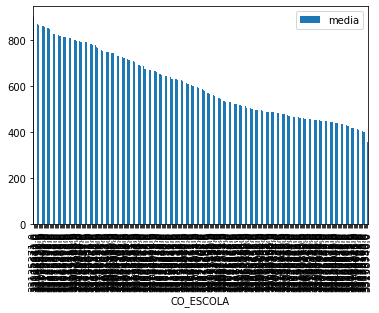

In [100]:
%matplotlib inline
df_melhores.join(df_escolas).plot.bar(y='media')

In [76]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_escolas.loc[(df_escolas.NO_ENTIDADE.str.contains('SAO VICENTE DE PAUL')) & (df_escolas.CO_UF == 33) & (df_escolas.CO_MUNICIPIO == 3304557)]

,NU_ANO_CENSO,NO_ENTIDADE,CO_ORGAO_REGIONAL,TP_SITUACAO_FUNCIONAMENTO,DT_ANO_LETIVO_INICIO,DT_ANO_LETIVO_TERMINO,CO_REGIAO,CO_MESORREGIAO,CO_MICRORREGIAO,CO_UF,CO_MUNICIPIO,CO_DISTRITO,TP_DEPENDENCIA,TP_LOCALIZACAO,TP_CATEGORIA_ESCOLA_PRIVADA,IN_CONVENIADA_PP,TP_CONVENIO_PODER_PUBLICO,IN_MANT_ESCOLA_PRIVADA_EMP,IN_MANT_ESCOLA_PRIVADA_ONG,IN_MANT_ESCOLA_PRIVADA_SIND,IN_MANT_ESCOLA_PRIVADA_SIST_S,IN_MANT_ESCOLA_PRIVADA_S_FINS,CO_ESCOLA_SEDE_VINCULADA,CO_IES_OFERTANTE,TP_REGULAMENTACAO,IN_LOCAL_FUNC_PREDIO_ESCOLAR,TP_OCUPACAO_PREDIO_ESCOLAR,IN_LOCAL_FUNC_SALAS_EMPRESA,IN_LOCAL_FUNC_SOCIOEDUCATIVO,IN_LOCAL_FUNC_UNID_PRISIONAL,IN_LOCAL_FUNC_PRISIONAL_SOCIO,IN_LOCAL_FUNC_TEMPLO_IGREJA,IN_LOCAL_FUNC_CASA_PROFESSOR,IN_LOCAL_FUNC_GALPAO,TP_OCUPACAO_GALPAO,IN_LOCAL_FUNC_SALAS_OUTRA_ESC,IN_LOCAL_FUNC_OUTROS,IN_PREDIO_COMPARTILHADO,IN_AGUA_FILTRADA,IN_AGUA_REDE_PUBLICA,IN_AGUA_POCO_ARTESIANO,IN_AGUA_CACIMBA,IN_AGUA_FONTE_RIO,IN_AGUA_INEXISTENTE,IN_ENERGIA_REDE_PUBLICA,IN_ENERGIA_GERADOR,IN_ENERGIA_OUTROS,IN_ENERGIA_INEXISTENTE,IN_ESGOTO_REDE_PUBLICA,IN_ESGOTO_FOSSA,IN_ESGOTO_INEXISTENTE,IN_LIXO_COLETA_PERIODICA,IN_LIXO_QUEIMA,IN_LIXO_JOGA_OUTRA_AREA,IN_LIXO_RECICLA,IN_LIXO_ENTERRA,IN_LIXO_OUTROS,IN_SALA_DIRETORIA,IN_SALA_PROFESSOR,IN_LABORATORIO_INFORMATICA,IN_LABORATORIO_CIENCIAS,IN_SALA_ATENDIMENTO_ESPECIAL,IN_QUADRA_ESPORTES_COBERTA,IN_QUADRA_ESPORTES_DESCOBERTA,IN_QUADRA_ESPORTES,IN_COZINHA,IN_BIBLIOTECA,IN_SALA_LEITURA,IN_BIBLIOTECA_SALA_LEITURA,IN_PARQUE_INFANTIL,IN_BERCARIO,IN_BANHEIRO_FORA_PREDIO,IN_BANHEIRO_DENTRO_PREDIO,IN_BANHEIRO_EI,IN_BANHEIRO_PNE,IN_DEPENDENCIAS_PNE,IN_SECRETARIA,IN_BANHEIRO_CHUVEIRO,IN_REFEITORIO,IN_DESPENSA,IN_ALMOXARIFADO,IN_AUDITORIO,IN_PATIO_COBERTO,IN_PATIO_DESCOBERTO,IN_ALOJAM_ALUNO,IN_ALOJAM_PROFESSOR,IN_AREA_VERDE,IN_LAVANDERIA,IN_DEPENDENCIAS_OUTRAS,NU_SALAS_EXISTENTES,NU_SALAS_UTILIZADAS,IN_EQUIP_TV,IN_EQUIP_VIDEOCASSETE,IN_EQUIP_DVD,IN_EQUIP_PARABOLICA,IN_EQUIP_COPIADORA,IN_EQUIP_RETROPROJETOR,IN_EQUIP_IMPRESSORA,IN_EQUIP_IMPRESSORA_MULT,IN_EQUIP_SOM,IN_EQUIP_MULTIMIDIA,IN_EQUIP_FAX,IN_EQUIP_FOTO,IN_COMPUTADOR,NU_EQUIP_TV,NU_EQUIP_VIDEOCASSETE,NU_EQUIP_DVD,NU_EQUIP_PARABOLICA,NU_EQUIP_COPIADORA,NU_EQUIP_RETROPROJETOR,NU_EQUIP_IMPRESSORA,NU_EQUIP_IMPRESSORA_MULT,NU_EQUIP_SOM,NU_EQUIP_MULTIMIDIA,NU_EQUIP_FAX,NU_EQUIP_FOTO,NU_COMPUTADOR,NU_COMP_ADMINISTRATIVO,NU_COMP_ALUNO,IN_INTERNET,IN_BANDA_LARGA,NU_FUNCIONARIOS,IN_ALIMENTACAO,TP_AEE,TP_ATIVIDADE_COMPLEMENTAR,IN_FUNDAMENTAL_CICLOS,TP_LOCALIZACAO_DIFERENCIADA,IN_MATERIAL_ESP_QUILOMBOLA,IN_MATERIAL_ESP_INDIGENA,IN_MATERIAL_ESP_NAO_UTILIZA,IN_EDUCACAO_INDIGENA,TP_INDIGENA_LINGUA,CO_LINGUA_INDIGENA,IN_BRASIL_ALFABETIZADO,IN_FINAL_SEMANA,IN_FORMACAO_ALTERNANCIA,IN_MEDIACAO_PRESENCIAL,IN_MEDIACAO_SEMIPRESENCIAL,IN_MEDIACAO_EAD,IN_ESPECIAL_EXCLUSIVA,IN_REGULAR,IN_EJA,IN_PROFISSIONALIZANTE,IN_COMUM_CRECHE,IN_COMUM_PRE,IN_COMUM_FUND_AI,IN_COMUM_FUND_AF,IN_COMUM_MEDIO_MEDIO,IN_COMUM_MEDIO_INTEGRADO,IN_COMUM_MEDIO_NORMAL,IN_ESP_EXCLUSIVA_CRECHE,IN_ESP_EXCLUSIVA_PRE,IN_ESP_EXCLUSIVA_FUND_AI,IN_ESP_EXCLUSIVA_FUND_AF,IN_ESP_EXCLUSIVA_MEDIO_MEDIO,IN_ESP_EXCLUSIVA_MEDIO_INTEGR,IN_ESP_EXCLUSIVA_MEDIO_NORMAL,IN_COMUM_EJA_FUND,IN_COMUM_EJA_MEDIO,IN_COMUM_EJA_PROF,IN_ESP_EXCLUSIVA_EJA_FUND,IN_ESP_EXCLUSIVA_EJA_MEDIO,IN_ESP_EXCLUSIVA_EJA_PROF,IN_COMUM_PROF,IN_ESP_EXCLUSIVA_PROF
CO_ENTIDADE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
33122504,2017,DISPENSARIO SAO VICENTE DE PAULO - CRECHE IRMA...,0160P,1,06/02/2017,15/12/2017,3,3306,33018,33,3304557,330455705,4,1,1.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,NaN,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,14.0,9.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,1.0,1.0,0.0,2.0,0.0,

In [22]:
df_escolas[df_escolas.NO_ENTIDADE.str.contains('ELEVA')]

,NU_ANO_CENSO,NO_ENTIDADE,CO_ORGAO_REGIONAL,TP_SITUACAO_FUNCIONAMENTO,DT_ANO_LETIVO_INICIO,DT_ANO_LETIVO_TERMINO,CO_REGIAO,CO_MESORREGIAO,CO_MICRORREGIAO,CO_UF,...,IN_ESP_EXCLUSIVA_MEDIO_INTEGR,IN_ESP_EXCLUSIVA_MEDIO_NORMAL,IN_COMUM_EJA_FUND,IN_COMUM_EJA_MEDIO,IN_COMUM_EJA_PROF,IN_ESP_EXCLUSIVA_EJA_FUND,IN_ESP_EXCLUSIVA_EJA_MEDIO,IN_ESP_EXCLUSIVA_EJA_PROF,IN_COMUM_PROF,IN_ESP_EXCLUSIVA_PROF
CO_ENTIDADE,,,,,,,,,,,,,,,,,,,,,
33178860,2018,ESCOLA ELEVA,11006,1,06/02/2018,21/12/2018,3,3306,33018,33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35133723,2018,ELEVACAO COLEGIO TECNICO,10602,1,29/01/2018,31/12/2018,3,3515,35061,35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35133553,2018,ELEVACAO COLEGIO,NaN,4,NaN,NaN,3,3515,35061,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


SÃ£o Vicente Ã© cÃ³digo 33063648

In [24]:
df_sv = df_rio.loc[df_rio.CO_ESCOLA == 33063648]
notas = list(filter(lambda x: 'NOTA' in x, df_sv.columns.to_list() ))
df_sv[notas].mean()

NU_NOTA_CN         604.105714
NU_NOTA_CH         679.708571
NU_NOTA_LC         640.694286
NU_NOTA_MT         735.060000
NU_NOTA_COMP1      162.857143
NU_NOTA_COMP2      170.857143
NU_NOTA_COMP3      160.571429
NU_NOTA_COMP4      168.571429
NU_NOTA_COMP5      154.857143
NU_NOTA_REDACAO    817.714286
dtype: float64

In [25]:
df_eleva = df_rio.loc[df_rio.CO_ESCOLA == 33178860]
notas = list(filter(lambda x: 'NOTA' in x, df_eleva.columns.to_list() ))
df_eleva[notas].mean()

NU_NOTA_CN        NaN
NU_NOTA_CH        NaN
NU_NOTA_LC        NaN
NU_NOTA_MT        NaN
NU_NOTA_COMP1     NaN
NU_NOTA_COMP2     NaN
NU_NOTA_COMP3     NaN
NU_NOTA_COMP4     NaN
NU_NOTA_COMP5     NaN
NU_NOTA_REDACAO   NaN
dtype: float64

In [11]:
df_melhores.shape

(272, 2)

In [12]:
df_turmas = pd.read_csv('dados/Microdados_Censo_Escolar_2017/DADOS/TURMAS.CSV', sep='|', encoding='latin1')

In [0]:
df_turmas.head()

In [0]:
df_turmas.columns.tolist()